
**Read the Dataset from kaggle**

In [2]:
import numpy as np
import pandas as pd
import os
x = 0
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        x = x + 1

**Import Libraries**

In [3]:
import os
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense ,Conv2D,MaxPooling2D,Dropout,Flatten,BatchNormalization
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

**load data**



In [4]:
data_with_mask=os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')
data_without_mask=os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')
print(f"length of with mask images: {len(data_with_mask)}  ")
print(f"length of without mask images: {len(data_without_mask)}  ")
print()
print(data_with_mask[0:5])
print(data_without_mask[0:5])

length of with mask images: 3725  
length of without mask images: 3828  

['with_mask_2241.jpg', 'with_mask_1406.jpg', 'with_mask_2212.jpg', 'with_mask_2148.jpg', 'with_mask_1974.jpg']
['without_mask_413.jpg', 'without_mask_3426.jpg', 'without_mask_3256.jpg', 'without_mask_1997.jpg', 'without_mask_3069.jpg']


In [5]:
label_with_mask=[1]*len(data_with_mask)# the creat the label data with mask
label_without_mask=[0]*len(data_without_mask)# the creat the label data without mask

**Check balanced labels**

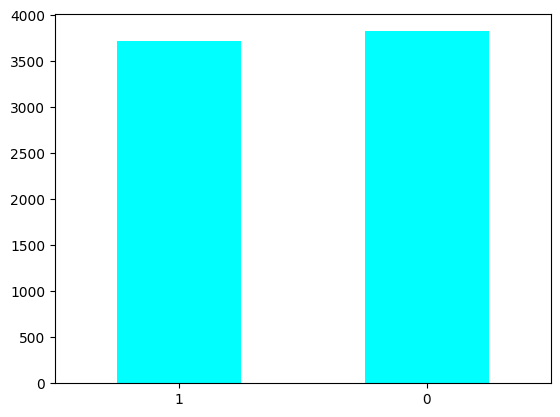

In [6]:
pd.Series({'1':len(label_with_mask),'0':len(label_without_mask)}).plot(kind='bar',color='cyan')
plt.xticks(rotation=1)
plt.show()

**Merge Labels**

In [7]:
merge_labels=label_with_mask+label_without_mask
print(f"length of total merged labels: {len(merge_labels)}  ")

length of total merged labels: 7553  


**showing some samples**

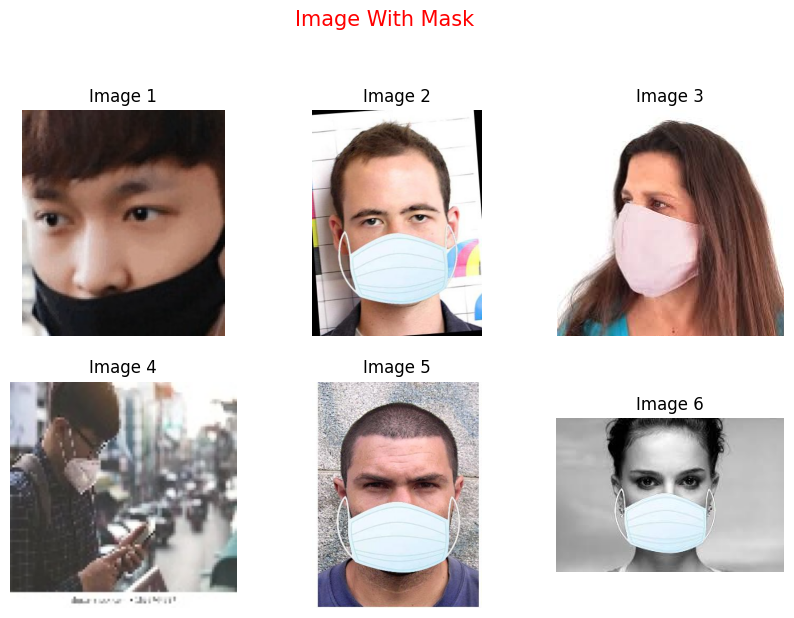

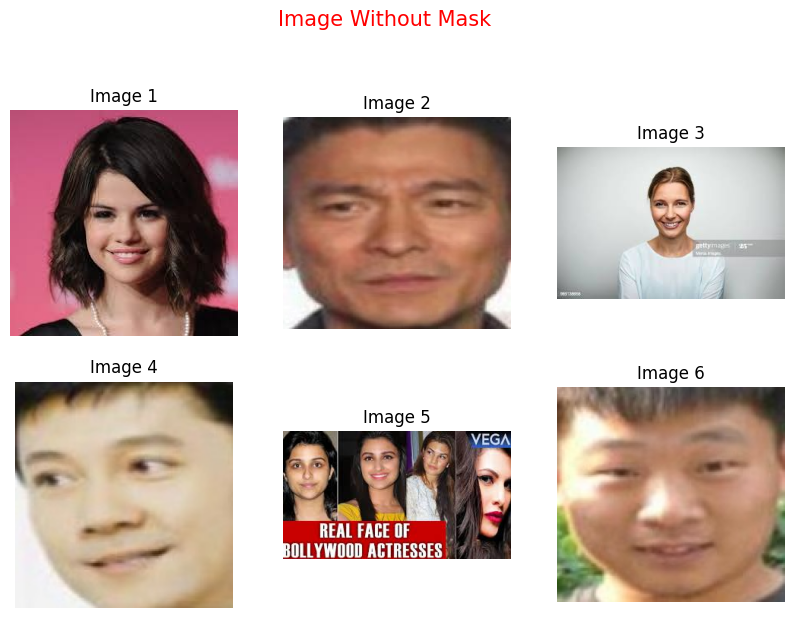

In [8]:
import random
def display_random_images(folder,num_sample,title):
  images=os.listdir(folder)
  images_sample=random.sample(images,num_sample)
  plt.figure(figsize=(10,10))
  for i , image in enumerate(images_sample):
    plt.subplot(3,3,i+1)
    image_path=os.path.join(folder,image)
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(f"Image {i+1}")
    plt.suptitle(f'{title}',color='red',size=15)
    plt.axis('off')
  plt.show()
display_random_images('/kaggle/input/face-mask-dataset/data/with_mask',6,'Image With Mask')
display_random_images('/kaggle/input/face-mask-dataset/data/without_mask',6,'Image Without Mask')

In [9]:
def image_preprocessing(folder):
  images=os.listdir(folder)
  data=[]
  for img in images:
    image=os.path.join(folder,img)
    image=cv2.imread(image)
    image=cv2.resize(image,(128,128))# image Rgb Contains 3 Channels
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    image=np.array(image)
    data.append(image)
  return data
data_with_mask=image_preprocessing('/kaggle/input/face-mask-dataset/data/with_mask')
data_without_mask=image_preprocessing('/kaggle/input/face-mask-dataset/data/without_mask')

In [10]:
Dataset=data_with_mask+data_without_mask
def scaling_data (data):
  return data/255

**Prepare data and split it into train , test**

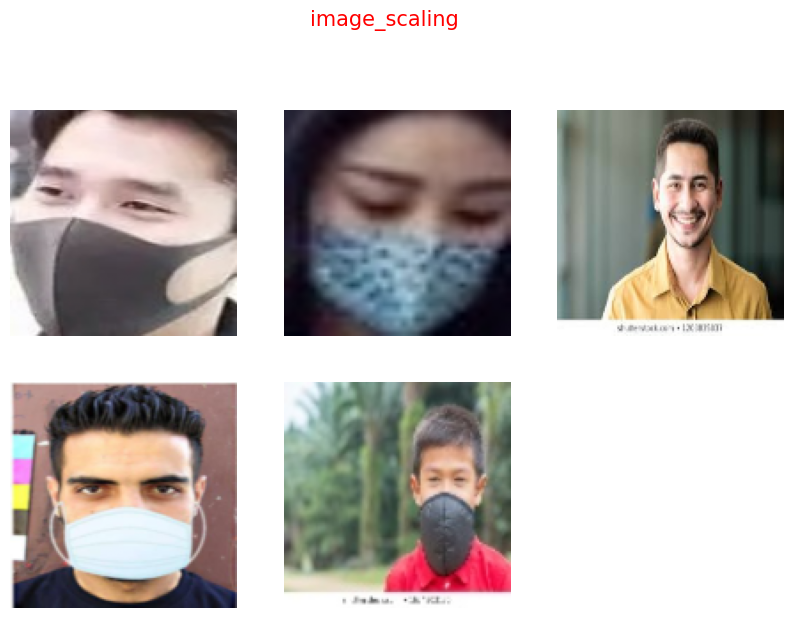

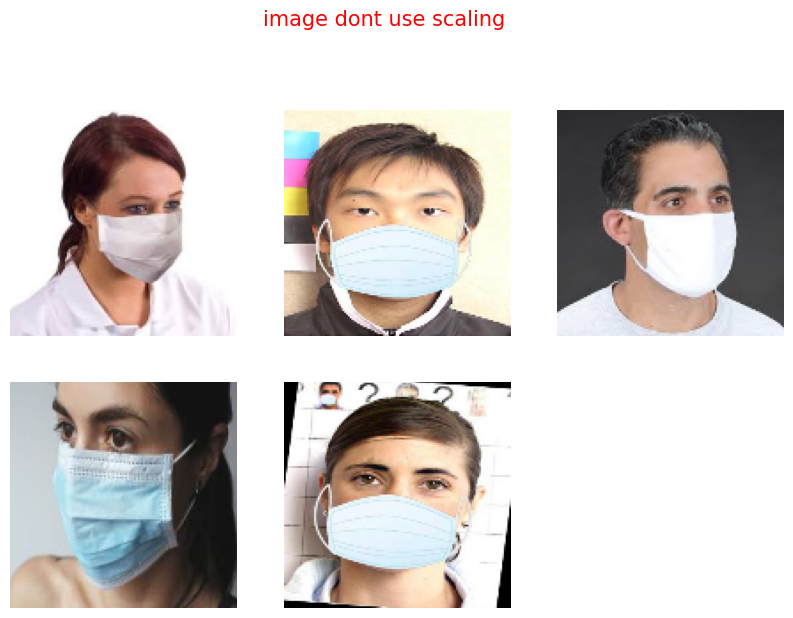

In [11]:
X=np.array(Dataset)
y=np.array(merge_labels)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=44,shuffle=True,stratify=y)
X_train_scaled = X_train/255
X_test_scaled = X_test/255

def display_images(images,title):
  plt.figure(figsize=(10,10))
  for i, image in enumerate(images):
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.suptitle(title,color='red',size=15)
  plt.show()

display_images(X_train_scaled[:5],'image_scaling')
display_images(X[:5],'image dont use scaling')

**Create CNN Model**

In [12]:
model = keras.Sequential()
odel = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(2, activation='sigmoid'))

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.15, epochs=10)

Epoch 1/10
171/171 [==============================] - 145s 834ms/step - loss: 0.4930 - accuracy: 0.7499 - val_loss: 0.3552 - val_accuracy: 0.8432
Epoch 2/10
171/171 [==============================] - 130s 759ms/step - loss: 0.2998 - accuracy: 0.8836 - val_loss: 0.2502 - val_accuracy: 0.8847
Epoch 3/10
171/171 [==============================] - 130s 762ms/step - loss: 0.2403 - accuracy: 0.9027 - val_loss: 0.3209 - val_accuracy: 0.8588
Epoch 4/10
171/171 [==============================] - 128s 752ms/step - loss: 0.2230 - accuracy: 0.9106 - val_loss: 0.2160 - val_accuracy: 0.9190
Epoch 5/10
171/171 [==============================] - 129s 755ms/step - loss: 0.1987 - accuracy: 0.9188 - val_loss: 0.2239 - val_accuracy: 0.9232
Epoch 6/10
171/171 [==============================] - 130s 759ms/step - loss: 0.1724 - accuracy: 0.9296 - val_loss: 0.2191 - val_accuracy: 0.9252
Epoch 7/10
171/171 [==============================] - 134s 786ms/step - loss: 0.1393 - accuracy: 0.9410 - val_loss: 0.2622 -

In [14]:
loss,accuracy=model.evaluate(X_test_scaled,y_test)

36/36 [==============================] - 6s 179ms/step - loss: 0.1820 - accuracy: 0.9382


In [26]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**plot loss and accuracy graph to check overfitting**

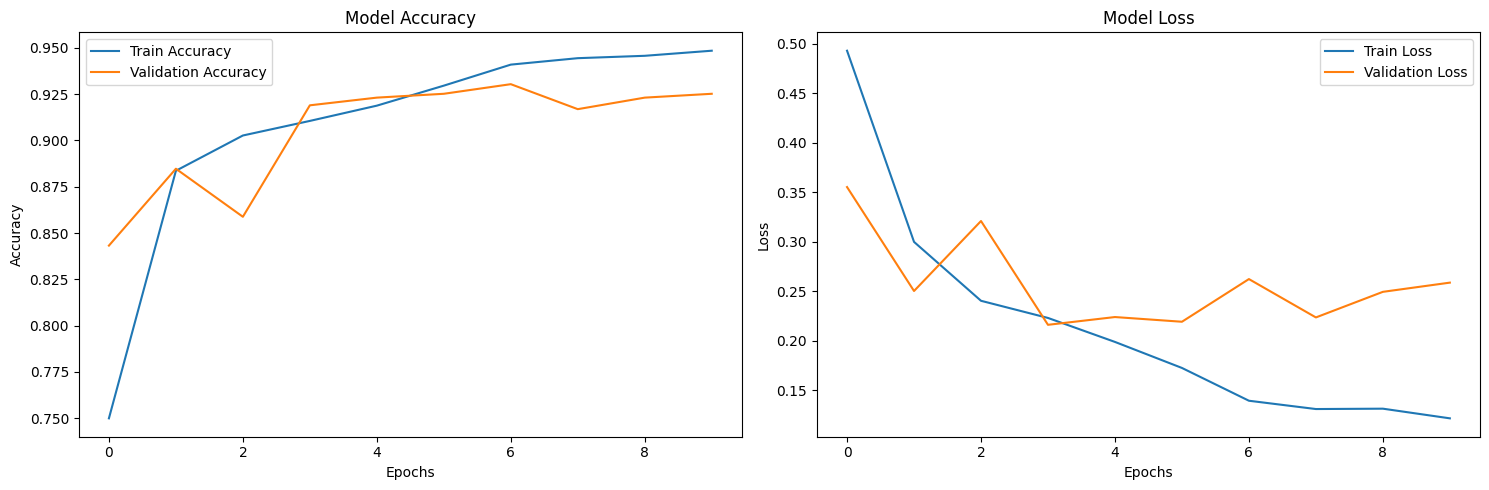

In [15]:
plt.figure(figsize=(15, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Try on real example**

In [16]:
import requests
from io import BytesIO

def deployment(path_file):
    image=cv2.imread(path_file)
    if image is None:
        response = requests.get(path_file)
        image = np.array(bytearray(BytesIO(response.content).read()), dtype=np.uint8)
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image = cv2.resize(image, (128, 128))

    image = np.array(image)
    image = image / 255.0

    image_rshape = np.reshape(image, [1, 128, 128, 3])

    prediction = model.predict(image_rshape)

    image_label = np.argmax(prediction)

    if image_label == 1:
        print("The image with mask")
    else:
        print("The image without mask")

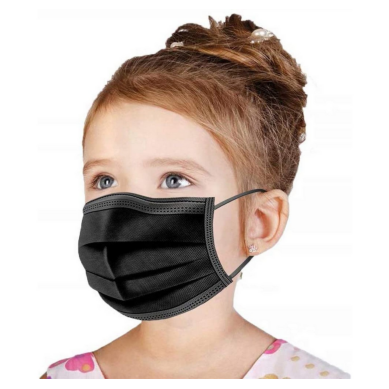

1/1 [==============================] - 0s 156ms/step
The image with mask


In [17]:
deployment('https://www.medigreen.pk/store/wp-content/uploads/face-mask.jpg')